In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

# Read the Parquet file into a DataFrame
df = pd.read_parquet('all_data_fixed_quarter_dates.parquet')

# Now you can work with the DataFrame 'df'


In [2]:
df = df[df['Rating'].notnull()]


In [3]:
df.dropna(axis=0,subset=df.columns[156], inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(axis=0, subset=df.columns[30:153],inplace=True)



# Credit Rating prediction 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df["Altman_Z"].values.reshape(-1, 1)

Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)


X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial',penalty="l2",class_weight='balanced') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.1297709923664122
F1 Score: 0.10004698418234105
majority baseline: 0.34096692111959287


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

X.drop(columns=["Ratio_A","Ratio_B","Ratio_C","Ratio_D","Ratio_E"],inplace=True)

Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial',class_weight='balanced') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.5458015267175572
F1 Score: 0.547039479493404
majority baseline: 0.34096692111959287


In [6]:
for column_name in X.columns:
    print(column_name)

cashAndCashEquivalents
shortTermInvestments
cashAndShortTermInvestments
netReceivables
inventory
otherCurrentAssets
totalCurrentAssets
propertyPlantEquipmentNet
goodwill
intangibleAssets
goodwillAndIntangibleAssets
longTermInvestments
taxAssets
otherNonCurrentAssets
totalNonCurrentAssets
otherAssets
totalAssets
accountPayables
shortTermDebt
taxPayables
deferredRevenue
otherCurrentLiabilities
totalCurrentLiabilities
longTermDebt
deferredRevenueNonCurrent
deferredTaxLiabilitiesNonCurrent
otherNonCurrentLiabilities
totalNonCurrentLiabilities
otherLiabilities
capitalLeaseObligations
totalLiabilities
preferredStock
commonStock
retainedEarnings
accumulatedOtherComprehensiveIncomeLoss
othertotalStockholdersEquity
totalStockholdersEquity
totalEquity
totalLiabilitiesAndStockholdersEquity
minorityInterest
totalLiabilitiesAndTotalEquity
totalInvestments
totalDebt
netDebt
cik_cash_flow_statement
netIncome
depreciationAndAmortization
deferredIncomeTax
stockBasedCompensation
changeInWorkingCapital
a

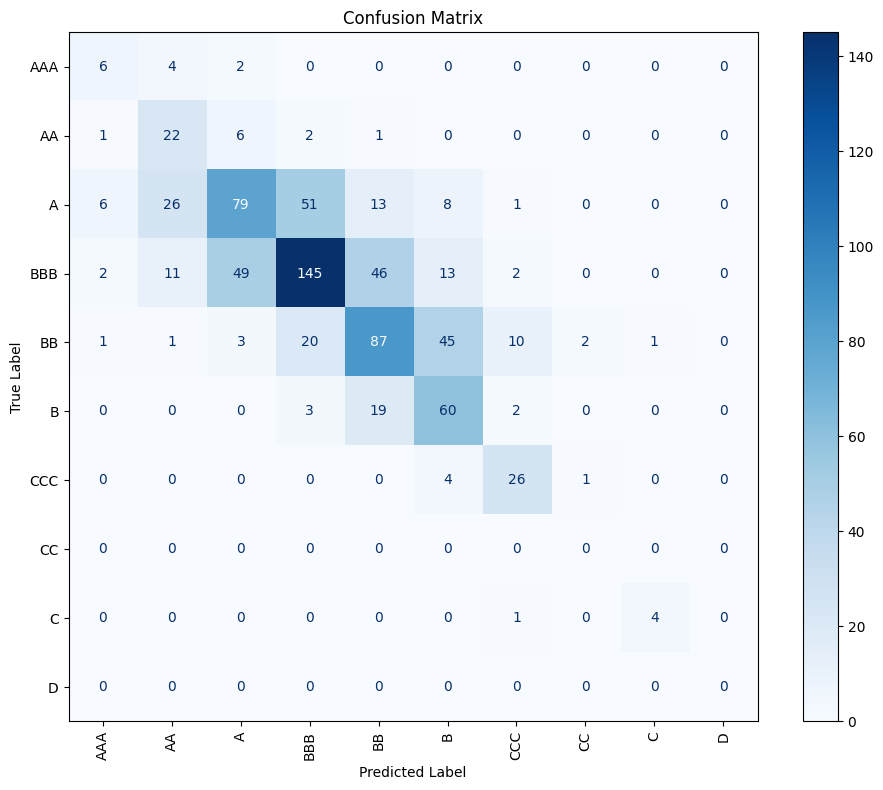

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(0,10))

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])
X.drop(columns=["Ratio_A","Ratio_B","Ratio_C","Ratio_D","Ratio_E"])
Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000,multi_class='multinomial',penalty="l1",solver="saga",class_weight='balanced') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.5330788804071247
F1 Score: 0.536667447632598
majority baseline: 0.34096692111959287


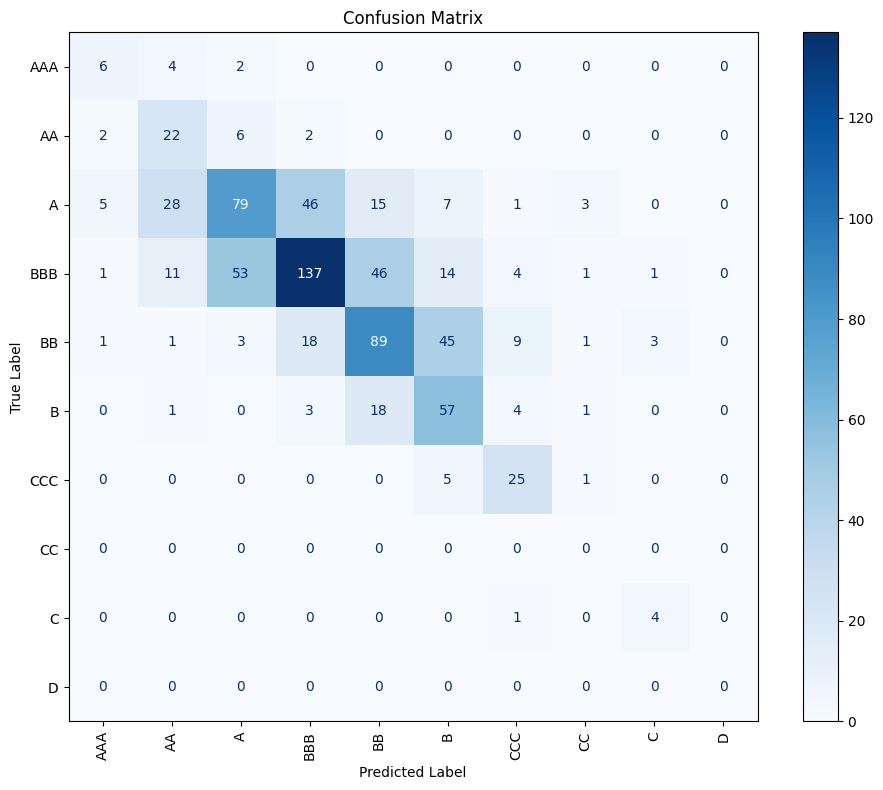

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(0,10))

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()




# Credit Rating Changing Prediction 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])
X.drop(columns=["Ratio_A","Ratio_B","Ratio_C","Ratio_D","Ratio_E"])

Y = df['Change Since Last Fixed Quarter Date']
Y = Y.map({-2: 'downgrade', -1: 'downgrade', 0: 'no change', 1: 'upgrade', 2: 'upgrade'})

custom_mapping = {'downgrade': 0, 'no change': 1, 'upgrade': 2}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded , test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model = LogisticRegression(max_iter=1000,multi_class='multinomial', solver='lbfgs') 
model = LogisticRegression(max_iter=5000,multi_class='multinomial',penalty="l1",solver="saga") 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.9312977099236641
F1 Score: 0.9018495609932716
majority baseline: 0.9351145038167938


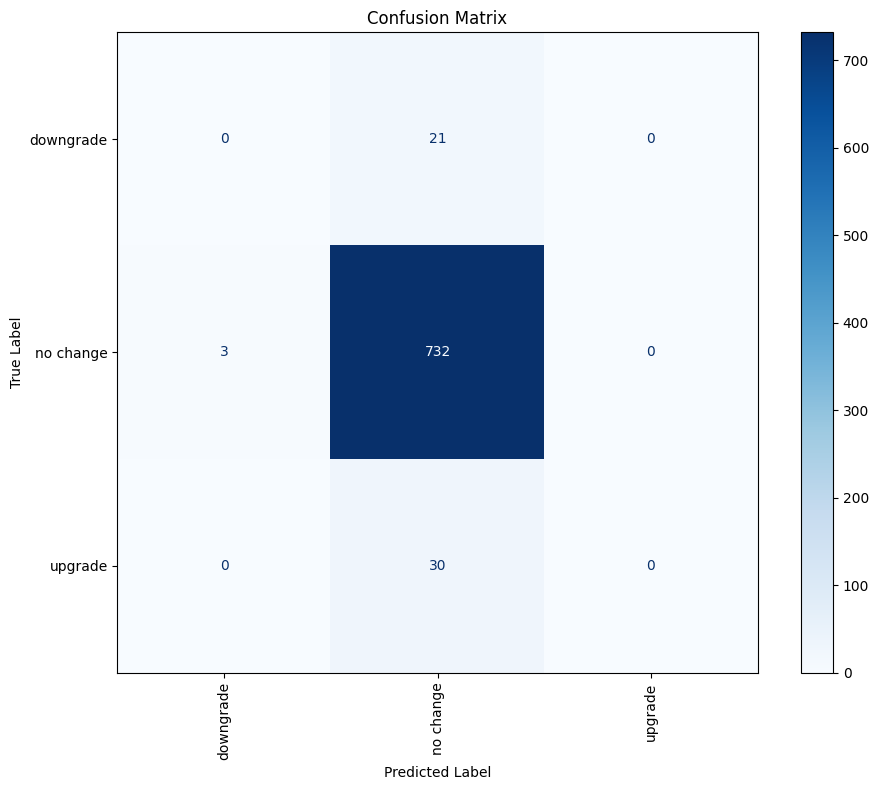

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()